### IMDb Scraper

Scrape IMDb for ratings of a series and plot it.

In [1]:
# Import necessary libraries
from bs4 import BeautifulSoup
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

In [38]:
# Get IMDb ID

inp = "the handmaids tail"
# Turn input into IMDb search url
inp = inp.replace(' ', '+')
search_url = "https://www.imdb.com/find?q={0}&ref_=nv_sr_sm".format(inp)

# Scrape search url for the IMDb ID of first search result
resp = requests.get(search_url)
soup = BeautifulSoup(resp.text)

imdbid = soup.find('td',{'class':'result_text'}).find('a',href=True)
imdbid = str(imdbid)[16:25]
print(imdbid)



tt5834204


In [39]:
num_seasons = 3
season = range(1,num_seasons+1)
titles = []
ratings = []
s_data = []


for s in season: 
    url = 'https://www.imdb.com/title/{}/episodes?season={}'.format(imdbid, s)
    
    resp = requests.get(url)
    soup = BeautifulSoup(resp.text)
    
    title_list = soup.find_all('a',{'itemprop':'name'})
    rating_list = soup.find_all('span',{'class':'ipl-rating-star__rating'})
    
    for x in title_list:
        titles.append(x.text)
        s_data.append(s)

    for x in rating_list:
        #print(x.text)
        if len(x.text)==3:
            ratings.append(float(x.text))
    
print(ratings)
# Check if number of ratings and names are the same
if len(ratings)!=len(titles):
    print("Here!")
    titles = titles[:len(ratings)]
    s_data = s_data[:len(ratings)]


print(titles)

d = {'Title':titles,'Season':s_data,'Rating':ratings}
df = pd.DataFrame(d)

# If duplicates in title add season number
dup = df['Title'].duplicated(keep=False)
if not df[dup].empty:
    df['Title'].loc[dup] = df[dup].apply(lambda x: str(x.Title)+' (S'+str(x.Season)+')',axis=1)
    
df

[8.3, 8.2, 8.7, 8.3, 8.3, 8.8, 8.0, 8.1, 8.8, 9.1, 8.9, 8.4, 8.1, 8.0, 8.1, 8.9, 8.3, 8.8, 9.0, 9.1, 8.4, 8.5, 8.7, 8.4, 7.8, 8.2, 8.1, 8.5, 8.2, 7.2, 7.7, 6.0, 8.2, 9.3, 8.2, 9.4]
['Offred', 'Birth Day', 'Late', 'Nolite Te Bastardes Carborundorum', 'Faithful', "A Woman's Place", 'The Other Side', 'Jezebels', 'The Bridge', 'Night', 'June', 'Unwomen', 'Baggage', 'Other Women', 'Seeds', 'First Blood', 'After', "Women's Work", 'Smart Power', 'The Last Ceremony', 'Holly', 'Postpartum', 'The Word', 'Night', 'Mary and Martha', 'Useful', 'God Bless the Child', 'Unknown Caller', 'Household', 'Under His Eye', 'Unfit', 'Heroic', 'Bear Witness', 'Liars', 'Sacrifice', 'Mayday']


C:\Users\STDG\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,Title,Season,Rating
0,Offred,1,8.3
1,Birth Day,1,8.2
2,Late,1,8.7
3,Nolite Te Bastardes Carborundorum,1,8.3
4,Faithful,1,8.3
5,A Woman's Place,1,8.8
6,The Other Side,1,8.0
7,Jezebels,1,8.1
8,The Bridge,1,8.8
9,Night (S1),1,9.1


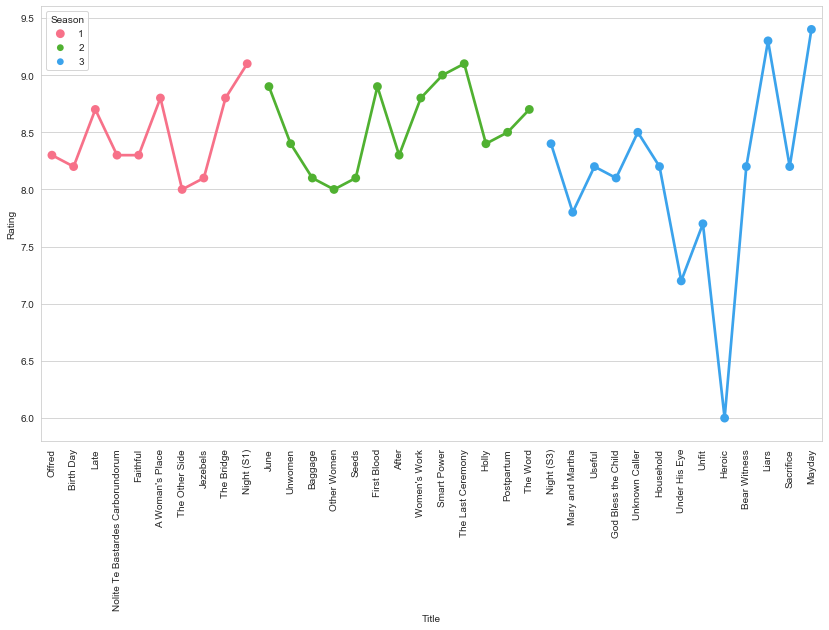

In [40]:
plt.figure(figsize=(14,8))
g = sns.pointplot(x='Title', y='Rating', 
                 hue='Season', data=df,
                 join=True,
                 legend=False,
                 palette=sns.color_palette("husl",df['Season'][df.index[-1]]))
plt.xticks(rotation=90)
plt.show()